## Mini Project 2

Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


Load given datasets

In [2]:
!wget https://www.dropbox.com/s/ofu25jzeebf4x30/Consumer_Complaints_train.csv
!wget https://www.dropbox.com/s/v9a5ec6m6463pss/Consumer_Complaints_test.csv

--2022-08-09 09:01:48--  https://www.dropbox.com/s/ofu25jzeebf4x30/Consumer_Complaints_train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ofu25jzeebf4x30/Consumer_Complaints_train.csv [following]
--2022-08-09 09:01:48--  https://www.dropbox.com/s/raw/ofu25jzeebf4x30/Consumer_Complaints_train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc722b65472ab1b1b5ad0d746d56.dl.dropboxusercontent.com/cd/0/inline/BqqcqPo1cTVn6AkAlLVzjjmhdmv7G-R7RDYaj5FY_H28OlTH30cyCzIsmTc-_mfcy489kpVRkM2l-OyVuZo_gbUS77b2G9-tevtSye7zLpQLByVPbLBXkZiYpmWeG7IE_PjRuifWUs3bRLiDpqt5lGoQC9yaEYR8JLhvYokB3TkzgA/file# [following]
--2022-08-09 09:01:48--  https://uc722b65472ab1b1b5ad0d746d56.dl.dropboxusercontent.com/cd/0/inline/BqqcqPo1cTVn6AkAl

Print top 5 records of train dataset

In [2]:
train_df=pd.read_csv('Consumer_Complaints_train.csv',parse_dates=['Date received'])
train_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


Print top 5 records of test dataset

In [3]:
test_df=pd.read_csv('Consumer_Complaints_test.csv',parse_dates=['Date received'])
test_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667


**Note: Please note that do all given tasks for test and train both datasets.**

Print shape of train and test datasets 

In [4]:
train_df.shape

(358810, 18)

In [5]:
test_df.shape

(119606, 17)

Print columns of train and test datasets

In [6]:
train_df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [7]:
test_df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')

Check data type for both datasets

In [8]:
train_df.dtypes

Date received                   datetime64[ns]
Product                                 object
Sub-product                             object
Issue                                   object
Sub-issue                               object
Consumer complaint narrative            object
Company public response                 object
Company                                 object
State                                   object
ZIP code                                object
Tags                                    object
Consumer consent provided?              object
Submitted via                           object
Date sent to company                    object
Company response to consumer            object
Timely response?                        object
Consumer disputed?                      object
Complaint ID                             int64
dtype: object

In [9]:
test_df.dtypes

Date received                   datetime64[ns]
Product                                 object
Sub-product                             object
Issue                                   object
Sub-issue                               object
Consumer complaint narrative            object
Company public response                 object
Company                                 object
State                                   object
ZIP code                                object
Tags                                    object
Consumer consent provided?              object
Submitted via                           object
Date sent to company                    object
Company response to consumer            object
Timely response?                        object
Complaint ID                             int64
dtype: object

Print missing values in percentage

In [10]:
percent_missing_train = train_df.isnull().sum() * 100 / len(train_df)
percent_missing_train

Date received                    0.000000
Product                          0.000000
Sub-product                     28.925058
Issue                            0.000000
Sub-issue                       61.139322
Consumer complaint narrative    84.342688
Company public response         81.067696
Company                          0.000000
State                            0.809063
ZIP code                         0.811293
Tags                            86.002062
Consumer consent provided?      71.689752
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.000000
Timely response?                 0.000000
Consumer disputed?               0.000000
Complaint ID                     0.000000
dtype: float64

In [11]:
percent_missing_test = test_df.isnull().sum() * 100 / len(test_df)
percent_missing_test

Date received                    0.000000
Product                          0.000000
Sub-product                     28.997709
Issue                            0.000000
Sub-issue                       61.242747
Consumer complaint narrative    84.186412
Company public response         81.221678
Company                          0.000000
State                            0.782569
ZIP code                         0.783406
Tags                            85.805896
Consumer consent provided?      71.651088
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.000000
Timely response?                 0.000000
Complaint ID                     0.000000
dtype: float64

Drop columns where more than 25% of the data are missing.

In [12]:
train_df.drop(columns=['Sub-product','Sub-issue','Consumer complaint narrative','Company public response','Tags','Consumer consent provided?'],axis=1,inplace=True)
test_df.drop(columns=['Sub-product','Sub-issue','Consumer complaint narrative','Company public response','Tags','Consumer consent provided?'],axis=1,inplace=True)


Extract Date, Month, and Year from the "Date Received" Column and create new fields for year, month, and day.

like, df_train['Year_Received'] = df_train['Date received']........(logic)

In [13]:
train_df['Year_Received'] = train_df['Date received'].dt.year
train_df['Month_Received'] = train_df['Date received'].dt.month
train_df['Day_Received'] = train_df['Date received'].dt.day

train_df.head()


,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Year_Received,Month_Received,Day_Received
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,2015,10,14
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,2015,4,26
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,2013,12,20
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,2016,3,3
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,2015,1,30


In [14]:
test_df['Year_Received'] = test_df['Date received'].dt.year
test_df['Month_Received'] = test_df['Date received'].dt.month
test_df['Day_Received'] = test_df['Date received'].dt.day
test_df.head()


,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Year_Received,Month_Received,Day_Received
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,2015,1,17
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,2016,6,22
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090,2015,9,4
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,2016,5,17
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667,2016,7,7


In [15]:
from datetime import datetime
train_df['Date sent to company'] =  pd.to_datetime(train_df['Date sent to company'])
test_df['Date sent to company'] =  pd.to_datetime(test_df['Date sent to company'])

Convert dates from object type to datetime type

In [16]:
train_df.dtypes

Date received                   datetime64[ns]
Product                                 object
Issue                                   object
Company                                 object
State                                   object
ZIP code                                object
Submitted via                           object
Date sent to company            datetime64[ns]
Company response to consumer            object
Timely response?                        object
Consumer disputed?                      object
Complaint ID                             int64
Year_Received                            int64
Month_Received                           int64
Day_Received                             int64
dtype: object

In [17]:
test_df.dtypes

Date received                   datetime64[ns]
Product                                 object
Issue                                   object
Company                                 object
State                                   object
ZIP code                                object
Submitted via                           object
Date sent to company            datetime64[ns]
Company response to consumer            object
Timely response?                        object
Complaint ID                             int64
Year_Received                            int64
Month_Received                           int64
Day_Received                             int64
dtype: object

Calculate the number of days the complaint was with the company

create new field with help given logic<br>
Like, Days held = Date sent to company - Date received

In [18]:
train_df['days_Held']= train_df['Date sent to company'] - train_df['Date received']
train_df.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Year_Received,Month_Received,Day_Received,days_Held
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,2015,10,14,0 days
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,2015,4,26,0 days
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,2013,12,20,14 days
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,2016,3,3,1 days
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,2015,1,30,0 days


In [19]:
test_df['days_Held']= test_df['Date sent to company'] - test_df['Date received']
test_df.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Year_Received,Month_Received,Day_Received,days_Held
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,2015,1,17,0 days
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,2016,6,22,0 days
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090,2015,9,4,0 days
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,2016,5,17,3 days
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667,2016,7,7,0 days


Convert "Days Held" to Int(above column)

In [20]:
train_df.dtypes

Date received                    datetime64[ns]
Product                                  object
Issue                                    object
Company                                  object
State                                    object
ZIP code                                 object
Submitted via                            object
Date sent to company             datetime64[ns]
Company response to consumer             object
Timely response?                         object
Consumer disputed?                       object
Complaint ID                              int64
Year_Received                             int64
Month_Received                            int64
Day_Received                              int64
days_Held                       timedelta64[ns]
dtype: object

In [21]:

train_df['days_Held']=(train_df['days_Held']/ np.timedelta64(1, 'D')).astype(int)
test_df['days_Held']=(test_df['days_Held']/ np.timedelta64(1, 'D')).astype(int)

In [22]:
train_df.dtypes

Date received                   datetime64[ns]
Product                                 object
Issue                                   object
Company                                 object
State                                   object
ZIP code                                object
Submitted via                           object
Date sent to company            datetime64[ns]
Company response to consumer            object
Timely response?                        object
Consumer disputed?                      object
Complaint ID                             int64
Year_Received                            int64
Month_Received                           int64
Day_Received                             int64
days_Held                                int64
dtype: object

Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID"

In [23]:
train_df.drop(columns=['Date sent to company','ZIP code','Complaint ID'],axis=1,inplace=True)
test_df.drop(columns=['Date sent to company','ZIP code','Complaint ID'],axis=1,inplace=True)

Impute null values in "State" by Mode 
(find mode and replace nan value)

In [24]:
train_df['State'].fillna(train_df['State'].mode()[0], inplace = True)
train_df.isnull().sum()


Date received                   0
Product                         0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Year_Received                   0
Month_Received                  0
Day_Received                    0
days_Held                       0
dtype: int64

In [25]:


test_df['State'].fillna(test_df['State'].mode()[0], inplace = True)
test_df.isnull().sum()

Date received                   0
Product                         0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Year_Received                   0
Month_Received                  0
Day_Received                    0
days_Held                       0
dtype: int64

Check Missing Values in the dataset

In [26]:
train_df.isnull().sum()

Date received                   0
Product                         0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Year_Received                   0
Month_Received                  0
Day_Received                    0
days_Held                       0
dtype: int64

Categorize Days into Weeks with the help of 'Days Received'

In [27]:
train_df['Week_Received'] = train_df['Date received'].dt.week
train_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


,Date received,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year_Received,Month_Received,Day_Received,days_Held,Week_Received
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,14,0,42
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,26,0,17
2,2013-12-20,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,20,14,51
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,3,1,9
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,30,0,5


In [28]:
test_df['Week_Received'] = test_df['Date received'].dt.week
test_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


,Date received,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year_Received,Month_Received,Day_Received,days_Held,Week_Received
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,2015,1,17,0,3
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,2016,6,22,0,25
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,2015,9,4,0,36
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,2016,5,17,3,20
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,2016,7,7,0,27


Drop "Day_Received" column

In [29]:
train_df.drop(columns='Date received' ,inplace=True)
test_df.drop(columns='Date received' ,inplace=True)

Print head of train and test dataset and observe

In [30]:
train_df.head()


,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year_Received,Month_Received,Day_Received,days_Held,Week_Received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,14,0,42
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,26,0,17
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,20,14,51
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,3,1,9
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,30,0,5


In [31]:
test_df.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year_Received,Month_Received,Day_Received,days_Held,Week_Received
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,2015,1,17,0,3
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,2016,6,22,0,25
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,2015,9,4,0,36
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,2016,5,17,3,20
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,2016,7,7,0,27


Store data of the disputed consumer in the new data frame as "disputed_cons"

In [32]:
disputed_cons=train_df[train_df["Consumer disputed?"]=="Yes"]
disputed_cons.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year_Received,Month_Received,Day_Received,days_Held,Week_Received
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,26,0,17
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,30,0,5
5,Credit card,APR or interest rate,TD Bank US Holding Company,FL,Web,Closed with explanation,Yes,Yes,2014,1,10,5,2
7,Credit card,Payoff process,Capital One,IL,Web,Closed with explanation,Yes,Yes,2015,12,7,0,50
8,Bank account or service,Deposits and withdrawals,"Citizens Financial Group, Inc.",PA,Web,Closed with relief,Yes,Yes,2012,4,5,0,14


In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data=le.fit_transform(train_df['Consumer disputed?'])
data=pd.DataFrame(data,columns=['Consumer disputed?'])
data.head()


,Consumer disputed?
0,0
1,1
2,0
3,0
4,1


In [34]:
train_df.drop(columns=['Consumer disputed?'],axis=1,inplace=True)

train_df['Consumer disputed']=data['Consumer disputed?']
train_df.head()


,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year_Received,Month_Received,Day_Received,days_Held,Week_Received,Consumer disputed
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,2015,10,14,0,42,0
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,2015,4,26,0,17,1
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,2013,12,20,14,51,0
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,2016,3,3,1,9,0
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,2015,1,30,0,5,1


Plot bar graph for the total no of disputes with the help of seaborn

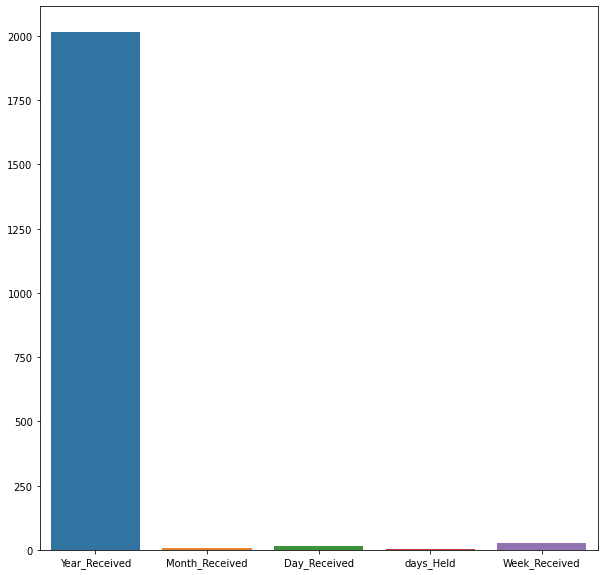

In [35]:
plt.figure(figsize=(10,10))
sns.barplot(data = disputed_cons)

Plot bar graph for the total no of disputes products-wise with help of seaborn

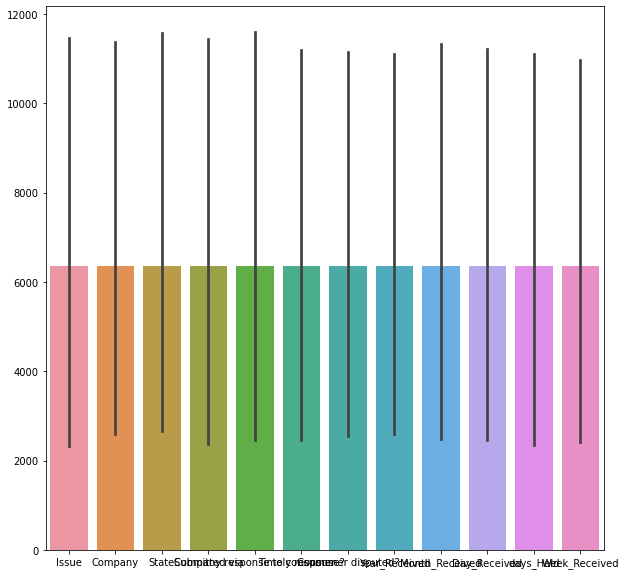

In [36]:
data=disputed_cons.groupby("Product").count()
plt.figure(figsize=(10,10))
sns.barplot(data=data)

Plot bar graph for the total no of disputes with Top Issues by Highest Disputes , with help of seaborn

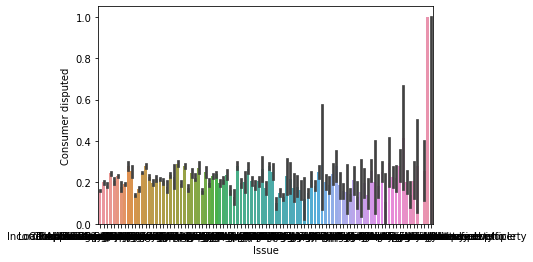

In [58]:
sns.barplot(x='Issue',y='Consumer disputed',data=train_df)

Plot bar graph for the total no of disputes by State with Maximum Disputes

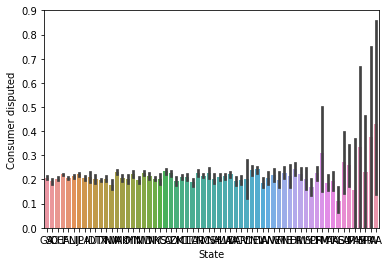

In [61]:
sns.barplot(x='State',y='Consumer disputed',data=train_df)

Plot bar graph for the total no of disputes by Submitted Via diffrent source 

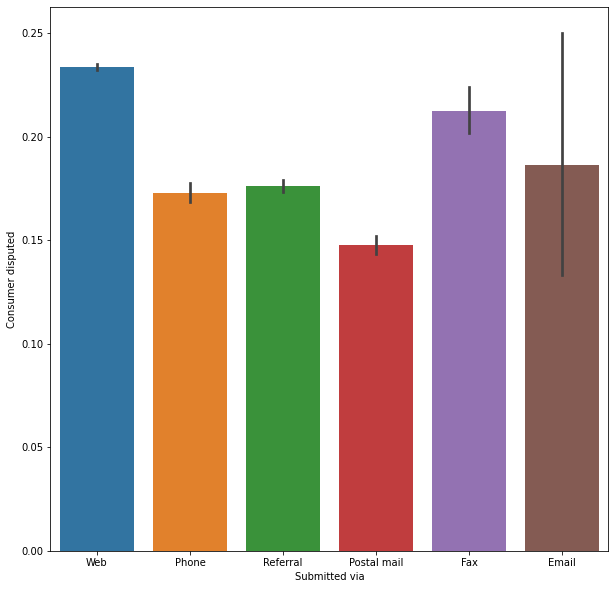

In [38]:
plt.figure(figsize=(10,10))
sns.barplot(x='Submitted via',y='Consumer disputed',data=train_df)

Plot bar graph for the total no of disputes wherevCompany's Response to the Complaints

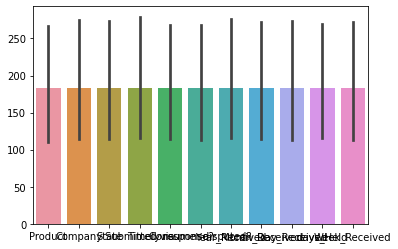

In [62]:
sns.barplot(data=disputed_cons.groupby(["Issue","Company response to consumer"]).count())

Plot bar graph for the total no of disputes where Company's Response Leading to Disputes

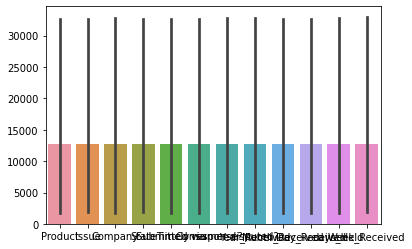

In [88]:
sns.barplot(data=disputed_cons.groupby("Company response to consumer").count())

Plot bar graph for the total no of disputes Whether there are Disputes Instead of Timely Response

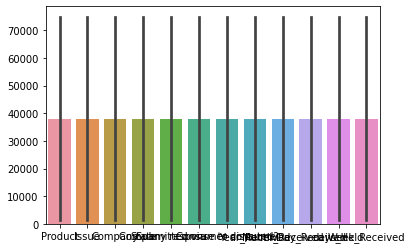

In [87]:
sns.barplot(data=disputed_cons.groupby("Timely response?").count())

Plot bar graph for the total no of disputes over Year Wise Complaints

In [78]:
year_complaints=train_df.groupby("Year_Received")['Issue'].count()
year_complaints

Year_Received
2011      1435
2012     42828
2013     64527
2014     89608
2015    100448
2016     59964
Name: Issue, dtype: int64

In [81]:
result=pd.DataFrame(year_complaints)
result

,Issue
Year_Received,
2011,1435
2012,42828
2013,64527
2014,89608
2015,100448
2016,59964


In [85]:
result.reset_index(level=0, inplace=True)
result

,index,Year_Received,Issue
0,0,2011,1435
1,1,2012,42828
2,2,2013,64527
3,3,2014,89608
4,4,2015,100448
5,5,2016,59964


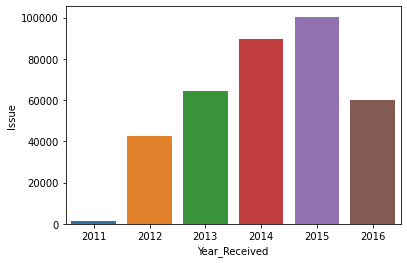

In [86]:
sns.barplot(x=result['Year_Received'],y=result['Issue'],data=result)

Plot bar graph for the total no of disputes over Year Wise Disputes

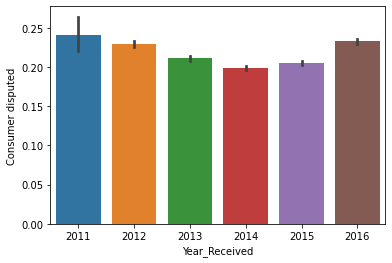

In [63]:
sns.barplot(x='Year_Received',y='Consumer disputed',data=train_df)

Plot  bar graph for the top companies with highest complaints

In [89]:
country_count=disputed_cons.groupby("Company")['Issue'].count()
country_count

Company
1st Alliance Lending                   1
1st Capital Mortgage, LLC              1
1st Franklin Financial Corporation     3
1st Money Center, Inc.                 1
1st Preference Mortgage                1
                                      ..
Zions Bancorporation                  32
Zions First National Bank              1
Zwicker & Associates                  19
eCon Credit LP                         1
iServe Trust                           1
Name: Issue, Length: 1942, dtype: int64

In [91]:
result=pd.DataFrame(country_count)
result

,Issue
Company,
1st Alliance Lending,1
"1st Capital Mortgage, LLC",1
1st Franklin Financial Corporation,3
"1st Money Center, Inc.",1
1st Preference Mortgage,1
...,...
Zions Bancorporation,32
Zions First National Bank,1
Zwicker & Associates,19


In [92]:
result.reset_index(level=0, inplace=True)
result

,Company,Issue
0,1st Alliance Lending,1
1,"1st Capital Mortgage, LLC",1
2,1st Franklin Financial Corporation,3
3,"1st Money Center, Inc.",1
4,1st Preference Mortgage,1
...,...,...
1937,Zions Bancorporation,32
1938,Zions First National Bank,1
1939,Zwicker & Associates,19
1940,eCon Credit LP,1


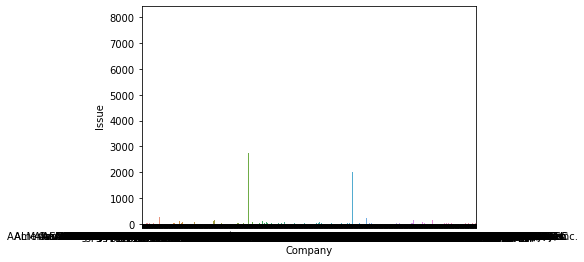

In [93]:
sns.barplot(x=result['Company'],y=result['Issue'],data=result)

"Days Held" Column Analysis(describe)

In [38]:
train_df["days_Held"].describe()

count    358810.000000
mean          4.456339
std          16.741676
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         993.000000
Name: days_Held, dtype: float64

Convert Negative Days Held to Zero(it is the time taken by authority can't be negative)

In [39]:
train_df['days_Held']=((train_df['days_Held']<=0)==0).astype('int')
train_df["days_Held"].describe()

count    358810.000000
mean          0.550489
std           0.497445
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: days_Held, dtype: float64

In [40]:
train_df.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year_Received,Month_Received,Day_Received,days_Held,Week_Received,Consumer disputed
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,2015,10,14,0,42,0
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,2015,4,26,0,17,1
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,2013,12,20,1,51,0
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,2016,3,3,1,9,0
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,2015,1,30,0,5,1


In [41]:
train_df.isna().sum()

Product                         0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Year_Received                   0
Month_Received                  0
Day_Received                    0
days_Held                       0
Week_Received                   0
Consumer disputed               0
dtype: int64

In [42]:
print(train_df.shape,test_df.shape)

(358810, 13) (119606, 12)


Text pre-processing
(It will be cover in upcoming calsses)

In [43]:
from nltk.tokenize import wordpunct_tokenize
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [44]:
relevant_text_train = train_df['Issue']
relevant_text_test = test_df['Issue']
tokenized_data_train = relevant_text_train.apply(lambda x: wordpunct_tokenize(x.lower()))
tokenized_data_test = relevant_text_test.apply(lambda x: wordpunct_tokenize(x.lower()))
def remove_punctuation(text):
    no_punctuation = []
    for w in text:
        if w not in string.punctuation:
            no_punctuation.append(w)
    return no_punctuation
no_punctuation_data_train = tokenized_data_train.apply(lambda x: remove_punctuation(x))
no_punctuation_data_test = tokenized_data_test.apply(lambda x: remove_punctuation(x))
stop_words = stopwords.words('english')
filtered_sentence_train = [w for w in no_punctuation_data_train if not w in stop_words]
filtered_sentence_train = pd.Series(filtered_sentence_train)
filtered_sentence_test = [w for w in no_punctuation_data_test if not w in stop_words]
filtered_sentence_test = pd.Series(filtered_sentence_test)
def lemmatize_text(text):
    lem_text = [WordNetLemmatizer().lemmatize(w,pos = 'v') for w in text]
    return lem_text
lemmatized_data_train = filtered_sentence_train.apply(lambda x:lemmatize_text(x))
lemmatized_data_test = filtered_sentence_test.apply(lambda x:lemmatize_text(x))
def stem_text(text):
    stem_text = [PorterStemmer().stem(w) for w in text]
    return stem_text
stemmed_data_train = lemmatized_data_train.apply(lambda x:stem_text(x))
stemmed_data_test = lemmatized_data_test.apply(lambda x:stem_text(x))
def word_to_sentence(text):
    text_sentence = " ".join(text)
    return text_sentence
clean_data_train = stemmed_data_train.apply(lambda x:word_to_sentence(x))
clean_data_test = stemmed_data_test.apply(lambda x:word_to_sentence(x))

In [45]:
train_df['Issues_cleaned'] = clean_data_train
test_df['Issues_cleaned'] = clean_data_test
train_df = train_df.drop('Issue', axis = 1)
test_df= test_df.drop('Issue', axis = 1)

In [46]:
print(train_df.shape,test_df.shape)

(358810, 13) (119606, 12)


Drop Unnecessary Columns for the Model Building<br>
like:'Company', 'State', 'Year_Received', 'Days_held'

In [47]:
train_df=train_df.drop(columns=['Company','State','Year_Received','days_Held'],axis=1)
test_df=test_df.drop(columns=['Company','State','Year_Received','days_Held'],axis=1)

Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)

In [48]:
train_df.head()

,Product,Submitted via,Company response to consumer,Timely response?,Month_Received,Day_Received,Week_Received,Consumer disputed,Issues_cleaned
0,Credit reporting,Web,Closed with explanation,Yes,10,14,42,0,incorrect inform on credit report
1,Bank account or service,Web,Closed with explanation,Yes,4,26,17,1,deposit and withdraw
2,Credit card,Phone,Closed with non-monetary relief,Yes,12,20,51,0,other
3,Debt collection,Referral,Closed with explanation,Yes,3,3,9,0,disclosur verif of debt
4,Debt collection,Web,Closed with explanation,Yes,1,30,5,1,disclosur verif of debt


Create Dummy Variables for catagorical features 
like: 'Product', 'Submitted via', 'Company response to consumer', 'Timely response?'

In [49]:
d2=pd.get_dummies(train_df['Product'])
d3=pd.get_dummies(train_df[ 'Submitted via'])
d4=pd.get_dummies(train_df['Company response to consumer'])
d5=pd.get_dummies(train_df["Timely response?"])
d6=pd.get_dummies(test_df['Product'])
d7=pd.get_dummies(test_df[ 'Submitted via'])
d8=pd.get_dummies(test_df['Company response to consumer'])
d9=pd.get_dummies(test_df["Timely response?"])

In [50]:
train_df=pd.concat([train_df,d2,d3,d4,d5],axis =1)
test_df=pd.concat([test_df,d6,d7,d8,d9],axis=1)


Concate Dummy Variables and Drop the Original Columns

In [51]:
train_df.head()

,Product,Submitted via,Company response to consumer,Timely response?,Month_Received,Day_Received,Week_Received,Consumer disputed,Issues_cleaned,Bank account or service,...,Referral,Web,Closed,Closed with explanation,Closed with monetary relief,Closed with non-monetary relief,Closed with relief,Closed without relief,No,Yes
0,Credit reporting,Web,Closed with explanation,Yes,10,14,42,0,incorrect inform on credit report,0,...,0,1,0,1,0,0,0,0,0,1
1,Bank account or service,Web,Closed with explanation,Yes,4,26,17,1,deposit and withdraw,1,...,0,1,0,1,0,0,0,0,0,1
2,Credit card,Phone,Closed with non-monetary relief,Yes,12,20,51,0,other,0,...,0,0,0,0,0,1,0,0,0,1
3,Debt collection,Referral,Closed with explanation,Yes,3,3,9,0,disclosur verif of debt,0,...,1,0,0,1,0,0,0,0,0,1
4,Debt collection,Web,Closed with explanation,Yes,1,30,5,1,disclosur verif of debt,0,...,0,1,0,1,0,0,0,0,0,1


In [52]:
train_df.drop(columns=['Product','Submitted via','Company response to consumer','Timely response?'],axis=1,inplace=True)

train_df.head()

,Month_Received,Day_Received,Week_Received,Consumer disputed,Issues_cleaned,Bank account or service,Consumer Loan,Credit card,Credit reporting,Debt collection,...,Referral,Web,Closed,Closed with explanation,Closed with monetary relief,Closed with non-monetary relief,Closed with relief,Closed without relief,No,Yes
0,10,14,42,0,incorrect inform on credit report,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
1,4,26,17,1,deposit and withdraw,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,12,20,51,0,other,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,3,3,9,0,disclosur verif of debt,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
4,1,30,5,1,disclosur verif of debt,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1


In [53]:
test_df.drop(columns=['Product','Submitted via','Company response to consumer','Timely response?'],axis=1,inplace=True)

test_df.head()

,Month_Received,Day_Received,Week_Received,Issues_cleaned,Bank account or service,Consumer Loan,Credit card,Credit reporting,Debt collection,Money transfers,...,Referral,Web,Closed,Closed with explanation,Closed with monetary relief,Closed with non-monetary relief,Closed with relief,Closed without relief,No,Yes
0,1,17,3,custom servic custom relat,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,6,22,25,payment to acct not credit,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,9,4,36,credit line increas decreas,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,5,17,20,problem when you be unabl to pay,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,7,7,27,improp contact or share of info,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1


In [54]:
print(train_df.shape,test_df.shape)

(358810, 31) (119606, 30)


In [55]:
train_df.head()

,Month_Received,Day_Received,Week_Received,Consumer disputed,Issues_cleaned,Bank account or service,Consumer Loan,Credit card,Credit reporting,Debt collection,...,Referral,Web,Closed,Closed with explanation,Closed with monetary relief,Closed with non-monetary relief,Closed with relief,Closed without relief,No,Yes
0,10,14,42,0,incorrect inform on credit report,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
1,4,26,17,1,deposit and withdraw,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,12,20,51,0,other,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,3,3,9,0,disclosur verif of debt,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
4,1,30,5,1,disclosur verif of debt,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1


In [56]:
train_df['Issues_cleaned'].mode()

0    loan modif collect foreclosur
dtype: object

In [57]:
train_df['Issues_cleaned'].fillna("loan modif collect foreclosur", inplace = True)
test_df['Issues_cleaned'].fillna("loan modif collect foreclosur", inplace = True)

In [58]:
train_df.head()

,Month_Received,Day_Received,Week_Received,Consumer disputed,Issues_cleaned,Bank account or service,Consumer Loan,Credit card,Credit reporting,Debt collection,...,Referral,Web,Closed,Closed with explanation,Closed with monetary relief,Closed with non-monetary relief,Closed with relief,Closed without relief,No,Yes
0,10,14,42,0,incorrect inform on credit report,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
1,4,26,17,1,deposit and withdraw,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,12,20,51,0,other,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,3,3,9,0,disclosur verif of debt,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
4,1,30,5,1,disclosur verif of debt,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1


In [59]:
print(train_df.shape,test_df.shape)

(358810, 31) (119606, 30)


Calculating TF-IDF

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
tf = TfidfVectorizer()
issues_cleaned_train = tf.fit_transform(train_df['Issues_cleaned']).toarray()
issues_cleaned_test = tf.fit_transform(test_df['Issues_cleaned']).toarray()
tf_columns_train = []
tf_columns_test = []
for i in range(issues_cleaned_train.shape[1]):
    tf_columns_train.append('Feature' + str(i+1))
for i in range(issues_cleaned_test.shape[1]):
    tf_columns_test.append('Feature' + str(i+1))
issues_train = pd.DataFrame(issues_cleaned_train, columns = tf_columns_train)
issues_test = pd.DataFrame(issues_cleaned_test, columns = tf_columns_test)
weights = pd.DataFrame(tf.idf_, index = tf.get_feature_names(), columns = ['Idf_weights']).sort_values(by = 'Idf_weights', ascending = False)
weights.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Idf_weights
exchang,11.998819
damag,11.593354
destroy,11.593354
overdraft,11.305672
featur,11.305672


In [62]:
print(train_df.shape,test_df.shape)

(358810, 31) (119606, 30)


Replacing Issues_cleaned by Vectorized Issues

In [63]:
train_df = train_df.drop('Issues_cleaned', axis = 1)
test_df = test_df.drop('Issues_cleaned', axis = 1)


In [64]:
test_df.shape

(119606, 29)

In [65]:
train_df.shape

(358810, 30)

In [66]:
train_df = pd.concat([train_df, issues_train], axis = 1)
test_df = pd.concat([test_df, issues_test], axis = 1)
Feature168 = [0] * 119606
test_df['Feature168'] = Feature168

In [67]:
test_df.shape

(119606, 197)

In [68]:
train_df.head()

,Month_Received,Day_Received,Week_Received,Consumer disputed,Bank account or service,Consumer Loan,Credit card,Credit reporting,Debt collection,Money transfers,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,10,14,42,0,0,0,0,1,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,4,26,17,1,1,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.596349,0.0,0.0,0.0,0.0
2,12,20,51,0,0,0,1,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,3,3,9,0,0,0,0,0,1,0,...,0.0,0.0,0.551342,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,1,30,5,1,0,0,0,0,1,0,...,0.0,0.0,0.551342,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [69]:
test_df.head()

,Month_Received,Day_Received,Week_Received,Bank account or service,Consumer Loan,Credit card,Credit reporting,Debt collection,Money transfers,Mortgage,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,1,17,3,0,0,1,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
1,6,22,25,0,1,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
2,9,4,36,0,0,1,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
3,5,17,20,0,1,0,0,0,0,0,...,0.0,0.0,0.406735,0.0,0.0,0.0,0.0,0.413484,0.0,0
4,7,7,27,0,0,0,0,1,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0


In [70]:
train_df.dtypes

Month_Received               int64
Day_Received                 int64
Week_Received                int64
Consumer disputed            int64
Bank account or service      uint8
                            ...   
Feature164                 float64
Feature165                 float64
Feature166                 float64
Feature167                 float64
Feature168                 float64
Length: 198, dtype: object

In [71]:
train_df.fillna(0,inplace=True)
test_df.fillna(0,inplace=True)

observe train and test datasets

In [72]:
train_df.head()
# test_df.head()

,Month_Received,Day_Received,Week_Received,Consumer disputed,Bank account or service,Consumer Loan,Credit card,Credit reporting,Debt collection,Money transfers,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,10,14,42,0,0,0,0,1,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,4,26,17,1,1,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.596349,0.0,0.0,0.0,0.0
2,12,20,51,0,0,0,1,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,3,3,9,0,0,0,0,0,1,0,...,0.0,0.0,0.551342,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,1,30,5,1,0,0,0,0,1,0,...,0.0,0.0,0.551342,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


Observe Shape of new Train and Test Datasets

In [73]:
train_df.shape

(358810, 198)

Scaling the Data Sets (note:discard dependent variable before doing standardization)

In [74]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=train_df.drop(columns=["Consumer disputed"],axis=1)
y_train=train_df["Consumer disputed"]
X_test=test_df
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

Do feature selection with help of PCA

In [75]:
from sklearn.decomposition import PCA

In [76]:
pca = PCA()
# Determine transformed features

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [77]:
X_train_pca=pd.DataFrame(X_train_pca,columns=train_df.drop(columns="Consumer disputed").columns)
X_test=pd.DataFrame(X_test,columns=test_df.columns)

In [78]:
np.round(pca.explained_variance_ratio_,2)

array([0.04, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.

Select top features which are covering 80% of the information 
(n=53),
<br>store this data into new dataframe,

In [79]:
pca = PCA(n_components=53)
train_pca = pca.fit_transform(X_train_pca)
train_pca.shape

(358810, 53)

In [80]:
np.sum(pca.explained_variance_ratio_)

0.7965522686959606

In [81]:
pca = PCA(n_components=53)
test_pca = pca.fit_transform(X_test_pca)
test_pca.shape

(119606, 53)

In [82]:
np.sum(pca.explained_variance_ratio_)

0.7998029233858444

Split the Data Sets Into X and Y by dependent and independent variables (data selected by PCA)


In [83]:
X_train=X_train_pca
X_test=test_pca

In [84]:
X_train.shape, y_train.shape, X_test.shape

((358810, 197), (358810,), (119606, 53))

Shapes of the datasets

In [85]:
X_train.shape, y_train.shape, X_test.shape

((358810, 197), (358810,), (119606, 53))

**Model building**
Build given models and mesure their test and validation accuracy 
build given models:
1. LogisticRegression
2. DecisionTreeClassifier
3. RandomForestClassifier
4. AdaBoostClassifier
5. GradientBoostingClassifier
6. KNeighborsClassifier
7. XGBClassifier

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.model_selection import KFold

In [87]:
logistic = LogisticRegression(random_state=15)
logistic =logistic.fit(X_train, y_train)
logistic.score(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7877037986678186

In [88]:
tree = DecisionTreeClassifier(random_state=15)
tree=tree.fit(X_train, y_train)
tree.score(X_train, y_train)


0.8333937181237981

In [89]:
random = RandomForestClassifier(max_depth=3)
random=random.fit(X_train, y_train)
random.score(X_train, y_train)

0.787709372648477

In [1]:
knn = KNeighborsClassifier(n_neighbors=3)
knn=knn.fit(X_train, y_train)
knn.score(X_train, y_train)


NameError: ignored

In [93]:
ada = AdaBoostClassifier(n_estimators=100, random_state=23).fit(X_train, y_train)
ada.score(X_train, y_train)

0.7877149466291352

In [2]:
gradient = GradientBoostingClassifier(n_estimators=100).fit(X_train, y_train)
gradient.score(X_train, y_train)

NameError: ignored

In [ ]:
xgb_clf = XGBClassifier(learning_rate=0.25, n_estimators=100).fit(X_train,y_train)
xgb_clf.score(X_train, y_train)

Final Model and Prediction for test data file

In [95]:
clf1 = DecisionTreeClassifier(random_state=23).fit(X_train,y_train)
y_test=clf1.predict(test_df)

Export Predictions to CSV

In [96]:
test_df["Consumer disputed"]=y_test

In [97]:
test_df.to_csv("output.csv")